In [1]:
#Importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
from math import sqrt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset

The dataset seems to contain a combination of energy-related measurements (generated energy and exported energy) along with weather-related variables (temperature, weather conditions).
The data appears to be recorded over a period spanning 2015-2019.
Each row likely represents measurements taken on a specific date.
The dataset may be useful for analyzing the relationship between weather conditions and energy generation/export over time.
Further analysis could involve exploring trends, correlations, and patterns within the data to gain insights into factors influencing energy generation and exportation.

In [2]:
#loading the data
data = pd.read_csv('12 chrfs.csv',sep=';')

In [3]:
#overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1461 non-null   object 
 1   Mes        1461 non-null   int64  
 2   Ano        1461 non-null   int64  
 3   Gen        1461 non-null   float64
 4   subGen     1461 non-null   float64
 5   mmGen      1461 non-null   float64
 6   Exp        1461 non-null   float64
 7   subExp     1461 non-null   float64
 8   mmExp      1461 non-null   float64
 9   PP         1461 non-null   float64
 10  Cond       1461 non-null   object 
 11  Temp min   1461 non-null   int64  
 12  Temp max   1461 non-null   int64  
 13  Temp med   1461 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 159.9+ KB


In [4]:
data.head()

Date  Mes   Ano     Gen  subGen    mmGen   Exp  subExp  mmExp     PP  \
0  01/07/2015    7  2015  23.185  -1.573  22.3985  20.0    -3.0   18.5  3.816   
1  02/07/2015    7  2015  21.612  -1.573  20.1875  17.0    -2.0   16.0  4.500   
2  03/07/2015    7  2015  18.763  -2.849  18.3315  15.0     0.0   15.0  4.176   
3  04/07/2015    7  2015  17.900  -0.863  16.7070  15.0    -2.0   14.0  3.816   
4  05/07/2015    7  2015  15.514  -2.386  17.3590  13.0     5.0   15.5  4.416   

     Cond  Temp min  Temp max  Temp med   
0    Fine        20        27       23.5  
1    Fine        19        27       23.0  
2    Fine        20        26       23.0  
3    Fine        19        25       22.0  
4  Cloudy        20        26       23.0

In [5]:
#statistical analysis of data
data.describe()

Mes          Ano          Gen       subGen        mmGen  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean      6.522930  2016.995209    20.583527    -0.003209    20.570801   
std       3.449884     1.225015     6.387388     5.897064     5.685225   
min       1.000000  2015.000000     1.853000   -20.185000     2.697500   
25%       4.000000  2016.000000    16.491000    -3.303000    16.942000   
50%       7.000000  2017.000000    21.371000     0.009000    20.997500   
75%      10.000000  2018.000000    25.498000     3.299000    24.745500   
max      12.000000  2019.000000    33.177000    24.229000    32.964000   

               Exp       subExp        mmExp           PP     Temp min  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     17.424367    -0.013689    17.412457     3.936791    23.232033   
std       6.393743     6.035423     5.660034     0.676425     2.901622   
min       1.000000   -20.000000     0.000000     0.672000    11.000000   
25%      13.000000    -4.000000    14.000000     3.696000    21.000000   
50%      18.000000     0.000000    18.000000     4.067000    24.000000   
75%      22.000000     3.000000    21.500000     4.356000    25.000000   
max      31.000000    25.000000    30.500000     5.004000    34.000000   

          Temp max    Temp med   
count  1461.000000  1461.000000  
mean     29.712526    26.472279  
std       2.638656     2.598884  
min      22.000000    16.500000  
25%      28.000000    24.500000  
50%      30.000000    26.500000  
75%      32.000000    28.500000  
max      43.000000    36.500000

### Plot 1 - Yearly distribution of exported energy
The plot illustrates the yearly distribution of exported energy over the available years in the dataset.
The x-axis represents the years ('Ano') in the dataset.
The y-axis represents the average exported energy ('Exp') for each year.
By visualizing this data, it becomes easier to identify any trends, patterns, or fluctuations in the exported energy over time.

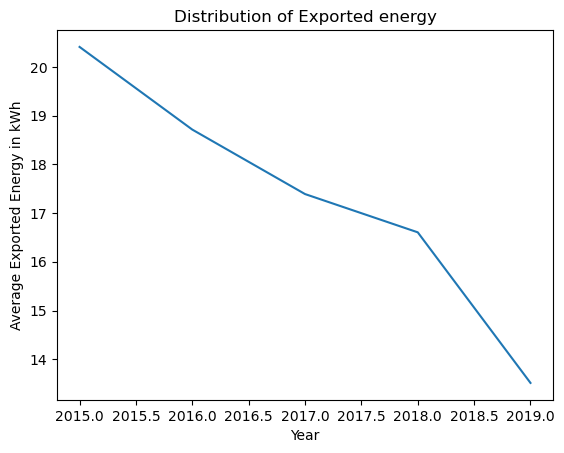

In [6]:
gen_data=data.groupby('Ano').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.xlabel('Year')  
plt.ylabel('Average Exported Energy in kWh')
plt.show()

### Plot 2 - Monthly distribution of generated energy
The plot illustrates the distribution of generated energy across the months.
The x-axis represents the months of the year.
The y-axis represents the average generated energy for each month.
By visualizing this data, it becomes easier to observe any seasonal trends or variations in the generation of energy throughout the year.
Peaks or troughs in the plot may indicate months with higher or lower levels of generated energy, respectively.

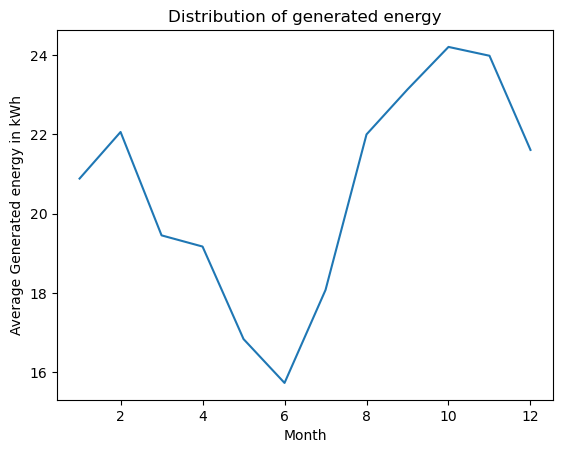

In [7]:
gen_data=data.groupby('Mes').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.xlabel('Month')
plt.ylabel('Average Generated energy in kWh')
plt.show()

### Plot 3 - Monthly distribution of Exported energy
The plot illustrates the distribution of exported energy across the months.
The x-axis represents the months of the year.
The y-axis represents the average exported energy for each month.
By visualizing this data, it becomes easier to observe any seasonal trends or variations in the exportation of energy throughout the year.
Peaks or troughs in the plot may indicate months with higher or lower levels of exported energy, respectively.

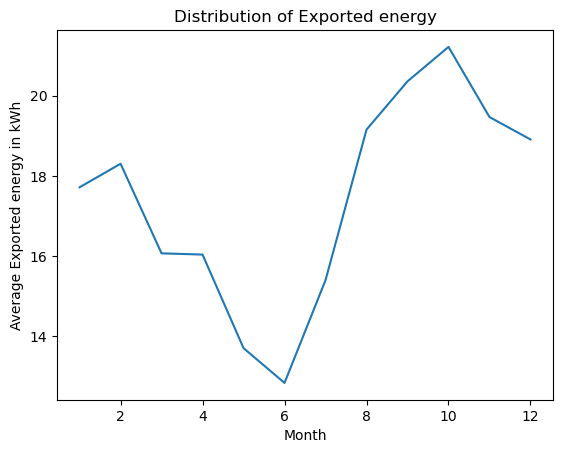

In [8]:
gen_data=data.groupby('Mes').mean()['Exp']
gen_data.plot(kind='line')
plt.title('Distribution of Exported energy')
plt.xlabel('Month')
plt.ylabel('Average Exported energy in kWh')
plt.show()

### Plot 4 - Yearly distribution of generated energy
The plot illustrates the distribution of generated energy across the years.
The x-axis represents the years.
The y-axis represents the average generated energy for each year.
By visualizing this data, it becomes easier to observe any long-term trends or variations in the generation of energy over the years.
Peaks or troughs in the plot may indicate years with higher or lower levels of generated energy, respectively.

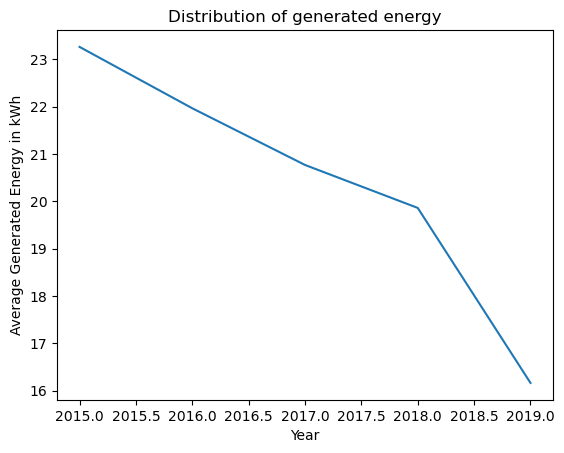

In [9]:
gen_data=data.groupby('Ano').mean()['Gen']
gen_data.plot(kind='line')
plt.title('Distribution of generated energy')
plt.xlabel('Year')
plt.ylabel('Average Generated Energy in kWh')
plt.show()

### Plot 5 - Count plot for weather condition
The plot illustrates the distribution of different weather conditions recorded in the dataset.
Each bar represents the count of occurrences of a particular weather condition.
The x-axis likely represents the different weather conditions.
The y-axis represents the count of occurrences.
By visualizing this data, it becomes easier to understand the frequency of each weather condition and identify any predominant weather patterns within the dataset.

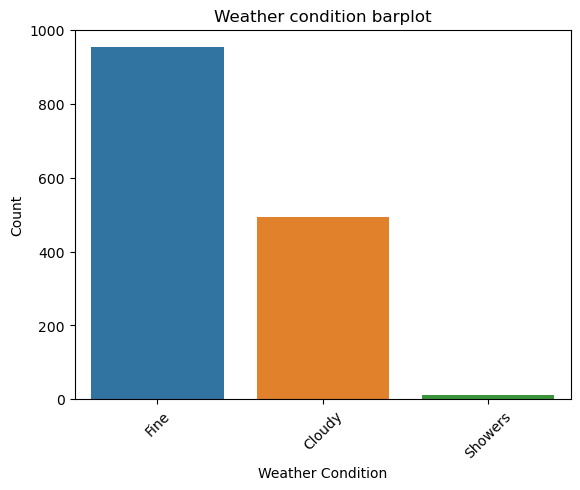

In [10]:
sns.countplot(x='Cond',data=data)
plt.title('Weather condition barplot')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Plot 6 - Distribution of generated energy
The plot illustrates the distribution of generated energy through a box plot.
The box plot provides information about the central tendency, dispersion, and skewness of the data.
The box represents the interquartile range (IQR), with the median depicted by the line inside the box.
The "whiskers" extending from the box show the range of the data, excluding outliers.
Any points outside of the whiskers are considered outliers and are plotted individually.
By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of generated energy within the dataset.

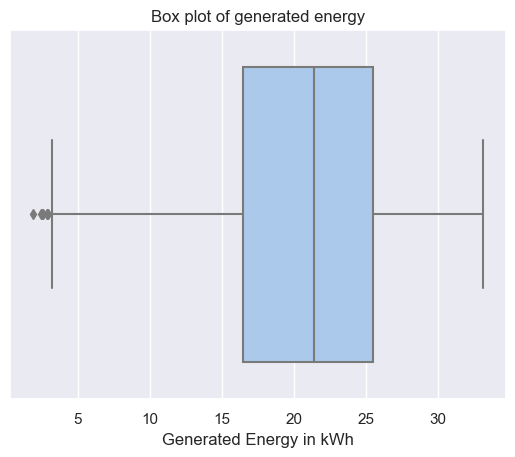

In [11]:
sns.set_theme(palette="pastel")
sns.boxplot(x=data['Gen'])
plt.title('Box plot of generated energy')
plt.xlabel('Generated Energy in kWh')
plt.show()

### Plot 7 - Distribution of exported energy
The plot illustrates the distribution of exported energy through a box plot.
Similar to the box plot for generated energy, this plot provides information about the central tendency, dispersion, and skewness of the exported energy data.
The box represents the interquartile range (IQR), with the median depicted by the line inside the box.
The "whiskers" extending from the box show the range of the data, excluding outliers.
Any points outside of the whiskers are considered outliers and are plotted individually.
By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of exported energy within the dataset.

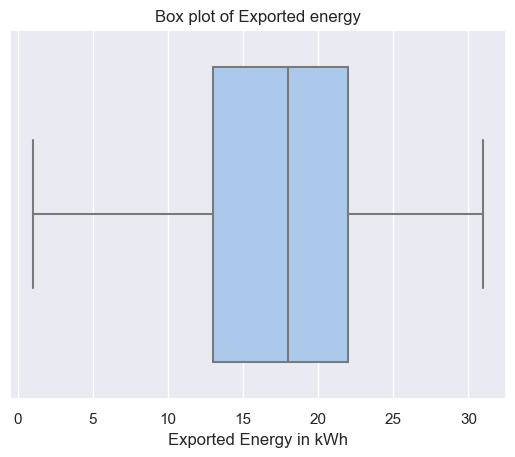

In [12]:
sns.set_theme( palette="pastel")
sns.boxplot(x=data['Exp'])
plt.title('Box plot of Exported energy')
plt.xlabel('Exported Energy in kWh')
plt.show()

### Plot 8 - Distribution of Peak Power
The plot illustrates the distribution of Peak Power (PP) through a box plot.
This type of plot provides information about the central tendency, dispersion, and skewness of the Peak Power data.
The box represents the interquartile range (IQR), with the median depicted by the line inside the box.
The "whiskers" extending from the box show the range of the data, excluding outliers.
Any points outside of the whiskers are considered outliers and are plotted individually.
By visualizing this data, it becomes easier to identify any potential outliers, the range of values, and the overall distribution of Peak Power within the dataset.

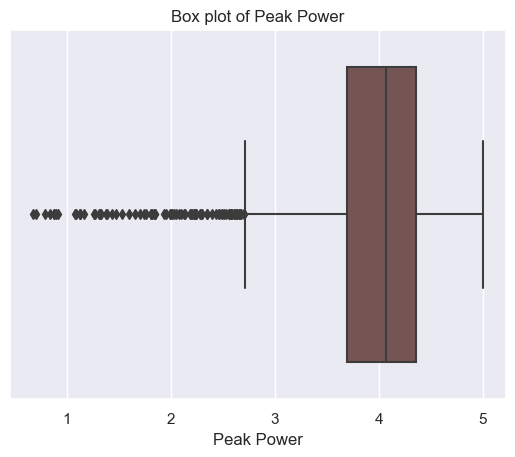

In [13]:
sns.set_theme(palette="pink")
sns.boxplot(x=data['PP'])
plt.title('Box plot of Peak Power')
plt.xlabel('Peak Power')
plt.show()

### Plot 9 - Scatter plot for association between generated and exported energy
The scatter plot visualizes the relationship between generated energy ('Gen') and exported energy ('Exp').
Each point on the plot represents a specific observation in the dataset, where the x-coordinate represents the generated energy and the y-coordinate represents the exported energy.
Points are colored based on the corresponding weather condition at the time of observation ('Cond').
This plot allows for the examination of how generated and exported energy levels vary with each other, as well as how they are influenced by different weather conditions.
Patterns or clusters of points may indicate associations between generated and exported energy levels under specific weather conditions.
By visualizing this data, it becomes easier to understand the relationships between these variables and how they are influenced by external factors such as weather conditions.

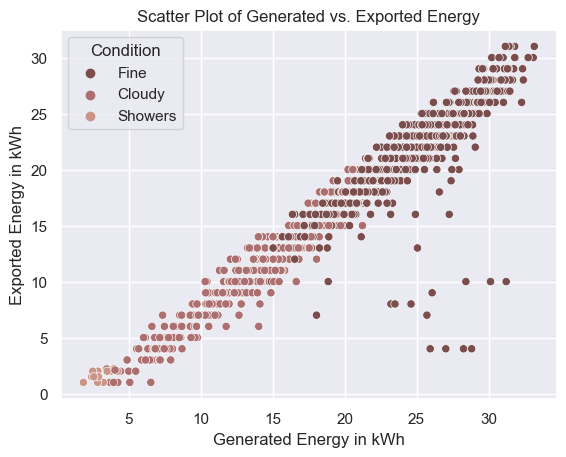

In [14]:
sns.scatterplot(data=data, x='Gen', y='Exp', hue='Cond')
plt.title('Scatter Plot of Generated vs. Exported Energy')
plt.xlabel('Generated Energy in kWh')  
plt.ylabel('Exported Energy in kWh')   
plt.legend(title='Condition') 
plt.show()

### Plot 10 - Line plot using weather conditions
The line plot illustrates the variation of Peak Power ('PP') with respect to years ('Ano').
Each line represents a different weather condition ('Cond').
The x-axis represents the years, and the y-axis represents the Peak Power.
By visualizing this data, it becomes easier to observe how Peak Power varies over the years and how different weather conditions might influence this variation.
This plot allows for the comparison of Peak Power trends across different weather conditions over time.

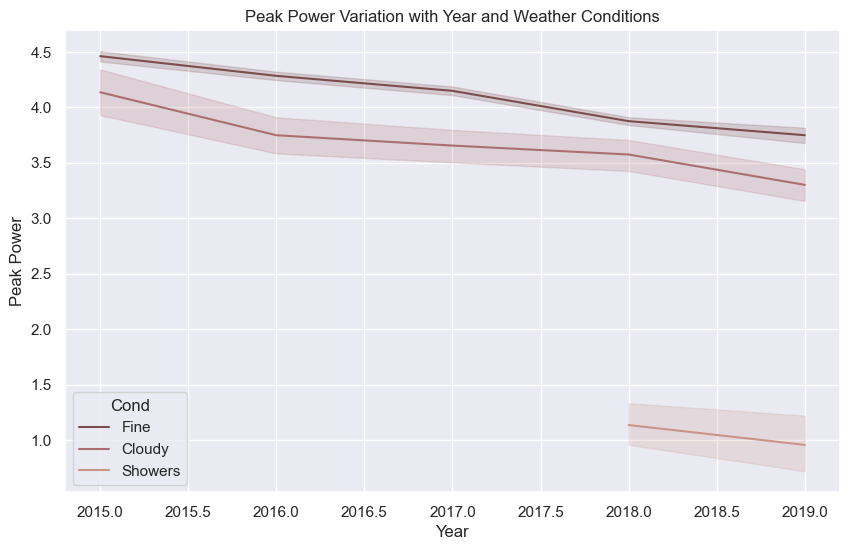

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting line plot with hue encoding weather conditions
sns.lineplot(data=data, x='Ano', y='PP', hue='Cond')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Peak Power')
plt.title('Peak Power Variation with Year and Weather Conditions')

# Display the plot
plt.show()

### Plot 11 - Relation with peakpower to the temperature
The scatter plot illustrates the relationship between the minimum temperature and Peak Power.
The regression line provides an approximation of the linear relationship between the minimum temperature and Peak Power.
By visualizing this data and examining the regression line, it becomes easier to understand the nature and strength of the relationship between minimum temperature and Peak Power.

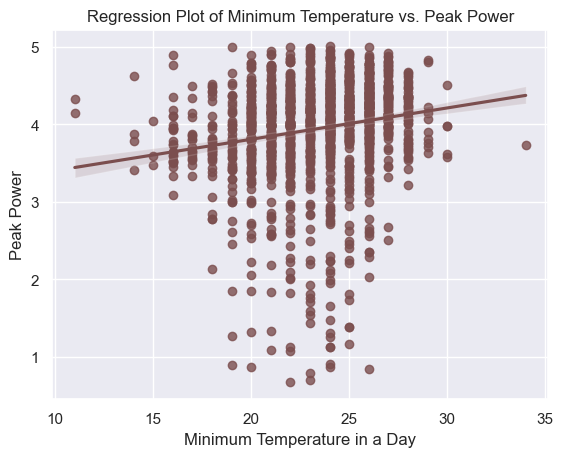

In [16]:
sns.regplot(x="Temp min", y="PP", data=data)
plt.title('Regression Plot of Minimum Temperature vs. Peak Power')
plt.xlabel('Minimum Temperature in a Day')
plt.ylabel('Peak Power')
plt.show()

### Correlation Matrix
The heatmap provides a visual representation of the correlation matrix, where each cell color indicates the strength and direction of the correlation between two variables.
The diagonal line of the heatmap shows perfect correlation (correlation coefficient of 1) between each variable and itself.
By visualizing this data, it becomes easier to identify variables that are strongly correlated, which can help in understanding the relationships and dependencies within the dataset.

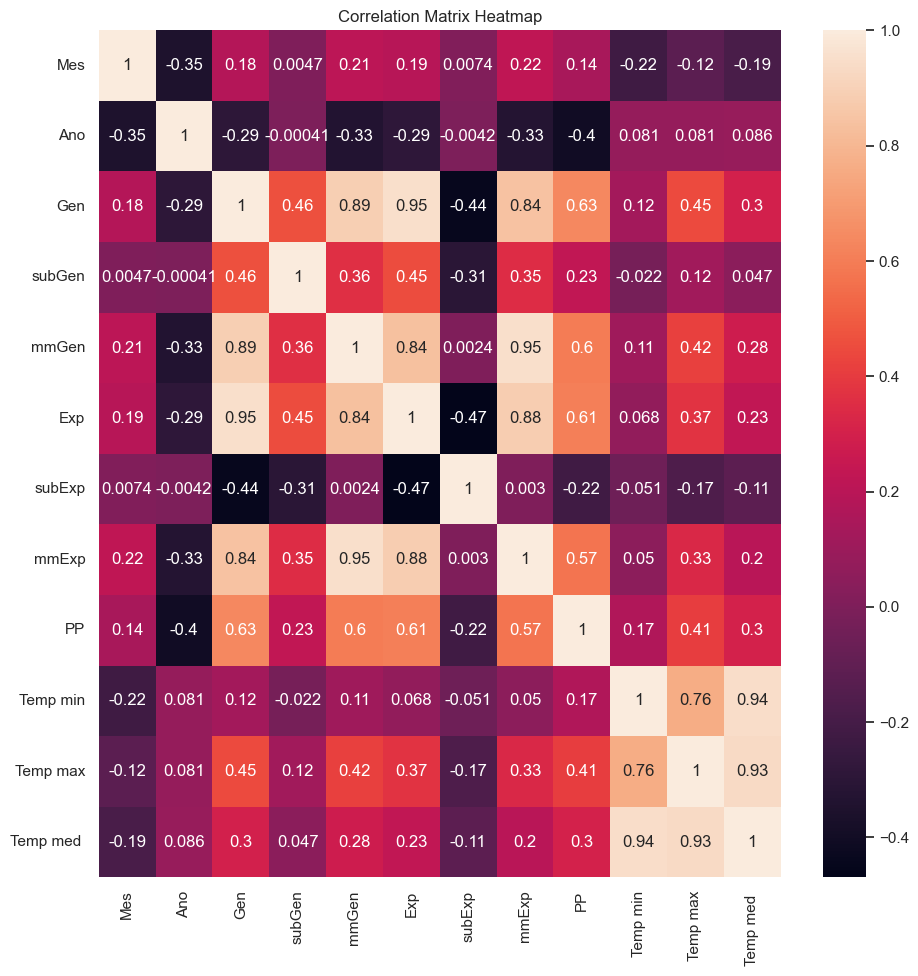

In [17]:
#correlation matrix
data_corr = data.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(data_corr,annot=True)
plt.title('Correlation Matrix Heatmap') 
plt.show()

The following code represents a systematic approach to identify strongly correlated pairs of features within a dataset. Beginning with the definition of a threshold value, set here as 0.8 to denote strong correlation, the code proceeds to iteratively examine each pair of features in the correlation matrix (data_corr). If the relationship between a pair of features is stronger than our threshold, we keep track of it. Finally, we print out these pairs of features along with how strong their relationship is. This helps us understand which features might be affecting each other a lot in our data. It's useful for tasks like picking out important features or figuring out if some features are too similar to each other.

In [18]:
# Set the threshold for strong correlation
threshold = 0.8

# Find strongly correlated pairs
strong_corr_pairs = []
for i in range(len(data_corr.columns)):
    for j in range(i+1, len(data_corr.columns)):
        if abs(data_corr.iloc[i, j]) > threshold:
            strong_corr_pairs.append((data_corr.columns[i], data_corr.columns[j], data_corr.iloc[i, j]))

# Print the strongly correlated pairs
for pair in strong_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

Gen - mmGen : 0.8860634209918019
Gen - Exp : 0.9516399256476886
Gen - mmExp : 0.8409348637451879
mmGen - Exp : 0.8371007582819341
mmGen - mmExp : 0.9494752494327066
Exp - mmExp : 0.8815686874458392
Temp min - Temp med  : 0.9439653583529928
Temp max - Temp med  : 0.9318138914194872


## Data Cleaning

This following code removes the columns named 'Date', 'Ano', and 'Mes' from the dataset. It does this by using the drop() function, specifying the column names to be dropped within a list, and setting the axis parameter to 1 to indicate columns (0 would indicate rows). The inplace=True parameter ensures that the changes are applied directly to the original dataset without needing to assign the result to a new variable.

In [19]:
#dropping the unnecessary columns
data.drop(['Date','Ano','Mes'],axis=1,inplace=True)

This line of code checks for missing values in each column of the dataset and sums up the count of missing values for each column.

In [20]:
data.isnull().sum()

Gen          0
subGen       0
mmGen        0
Exp          0
subExp       0
mmExp        0
PP           0
Cond         0
Temp min     0
Temp max     0
Temp med     0
dtype: int64

## Data Encoding

This code snippet is for encoding categorical columns in the dataset. It utilizes the LabelEncoder from the preprocessing module. Specifically, it encodes the categorical column named 'Cond' which is weather condition. After encoding, the 'Cond' column will contain numerical values instead of categorical labels.

In [21]:
#encoding the categorical columns
le=preprocessing.LabelEncoder()
data['Cond'] = le.fit_transform(data['Cond'])

## Splitting the dataset

This code snippet is responsible for splitting the dataset into features and targets for two different purposes: one for generated energy and the other for exported energy. 
For generated energy prediction:
X_train_gen, X_test_gen: These variables hold the training and testing features respectively for generated energy prediction.
y_train_gen, y_test_gen: These variables hold the training and testing target values respectively for generated energy prediction.
For exported energy prediction:
X_train_exp, X_test_exp: These variables hold the training and testing features respectively for exported energy prediction.
y_train_exp, y_test_exp: These variables hold the training and testing target values respectively for exported energy prediction.
The train_test_split function from the sklearn.model_selection module is used to split the data into training and testing sets, with 80% of the data used for training and 20% for testing.

In [22]:
#seperating the features and targets
X_gen = data.drop('Gen',axis=1)  #generated energy features
y_gen = data['Gen']              #generated energy targets

X_exp = data.drop('Exp',axis=1)  #exported energy features
y_exp = data['Exp']              #exported energy targets


#splitting the data
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen,y_gen,test_size=0.2)

X_train_exp, X_test_exp, y_train_exp, y_test_exp  = train_test_split(X_exp,y_exp,test_size=0.2)

## Ensemble Models

In this Python code snippet, a stacked ensemble model is being constructed using scikit-learn's StackingRegressor class. The ensemble comprises four base models: K-Nearest Neighbors (KNN) regressor, Support Vector Regressor (SVR), Random Forest regressor, and Linear Regression. These models are combined using stacking, a technique that aggregates predictions from multiple models to improve overall performance. During training, the predictions of the base models are used as features for a final meta-estimator, which in this case is a Lasso regression model. The cv parameter is set to 10, indicating that 10-fold cross-validation will be used to train the base models and the meta-estimator. Stacking helps to leverage the strengths of individual models while mitigating their weaknesses, potentially leading to better predictive performance compared to any single model alone.

In [23]:
base_models = [
    ('KNN', KNeighborsRegressor()),
    ('SVR',SVR()),
    ('Random Forest',RandomForestRegressor()),
    ('Linear Regression',LinearRegression())
    ]
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = Lasso(),
    cv = 10)

## For generated energy

This following code iterates over a list of base machine learning models, fitting each model to the training data for generated energy prediction and evaluating its performance on the test data. For each model, it calculates metrics such as the coefficient of determination (R^2), root mean squared error (RMSE), mean squared error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE), printing these metrics for analysis. After evaluating individual models, it trains a stacked ensemble model on the same training data and evaluates its performance similarly. Finally, it generates a scatter plot comparing the actual generated energy values to the predicted values from the stacked ensemble, providing visual insight into the model's performance.

-------KNN-------
Coefficient of determination: 0.9694719923086643
Root Mean Squared Error: 1.1210353553076857
Mean Squared Error: 1.2567202678498293
Mean Absolute Error: 0.7870047781569964
Mean Absolute Percentage Error: 0.05544223306887962
----------------------------------

-------SVR-------
Coefficient of determination: 0.9702742204671881
Root Mean Squared Error: 1.1062077699934811
Mean Squared Error: 1.2236956303939506
Mean Absolute Error: 0.6421633750917842
Mean Absolute Percentage Error: 0.050472327427430755
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9782276878483612
Root Mean Squared Error: 0.9467217495440398
Mean Squared Error: 0.8962820710597276
Mean Absolute Error: 0.6935846075085327
Mean Absolute Percentage Error: 0.04177898123243345
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9852460833461304
Root Mean Squared Error: 0.7793342111606892
Mean Squared Error: 0.60736181

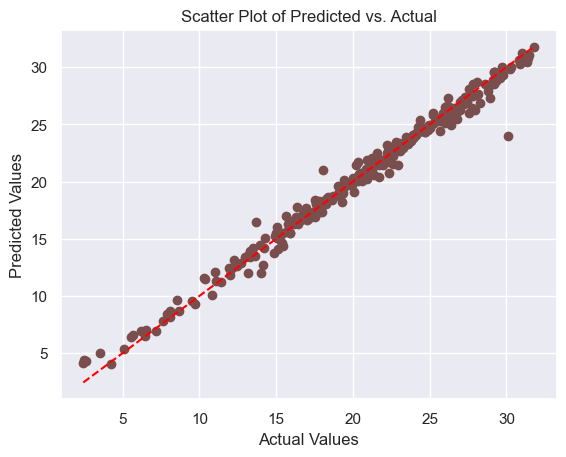

In [24]:
#generated energy
for name, model in base_models:
    model.fit(X_train_gen, y_train_gen)
    prediction = model.predict(X_test_gen)

    r2 = model.score(X_test_gen, y_test_gen)
    rmse = mean_squared_error(y_test_gen, prediction, squared = False)
    mse = mean_squared_error(y_test_gen, prediction)
    mae = mean_absolute_error(y_test_gen, prediction)
    mape = mean_absolute_percentage_error(y_test_gen, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_gen, y_train_gen)
stacked_prediction = stacked.predict(X_test_gen)
stacked_r2 = stacked.score(X_test_gen, y_test_gen)
stacked_rmse = mean_squared_error(y_test_gen, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_gen, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_gen, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_gen, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_gen, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

## For exported energy

This code iterates over a list of base machine learning models, fitting each model to the training data for exported energy prediction and evaluating its performance on the test data. For each model, it calculates metrics such as the coefficient of determination (R^2), root mean squared error (RMSE), mean squared error (MSE), mean absolute error (MAE), and mean absolute percentage error (MAPE), printing these metrics for analysis. After evaluating individual models, it trains a stacked ensemble model on the same training data and evaluates its performance similarly. Finally, it generates a scatter plot comparing the actual generated energy values to the predicted values from the stacked ensemble, providing visual insight into the model's performance.

-------KNN-------
Coefficient of determination: 0.9637225396509933
Root Mean Squared Error: 1.2234673493595183
Mean Squared Error: 1.4968723549488057
Mean Absolute Error: 0.8262798634812286
Mean Absolute Percentage Error: 0.0809814186084544
----------------------------------

-------SVR-------
Coefficient of determination: 0.9913985708302377
Root Mean Squared Error: 0.5957434203247082
Mean Squared Error: 0.35491022286018187
Mean Absolute Error: 0.31183405062065767
Mean Absolute Percentage Error: 0.04893638639131541
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.9459793982119435
Root Mean Squared Error: 1.492978847670135
Mean Squared Error: 2.228985839590444
Mean Absolute Error: 0.785580204778157
Mean Absolute Percentage Error: 0.07377752051267979
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.9999692856131414
Root Mean Squared Error: 0.03559957971919228
Mean Squared Error: 0.0012673300

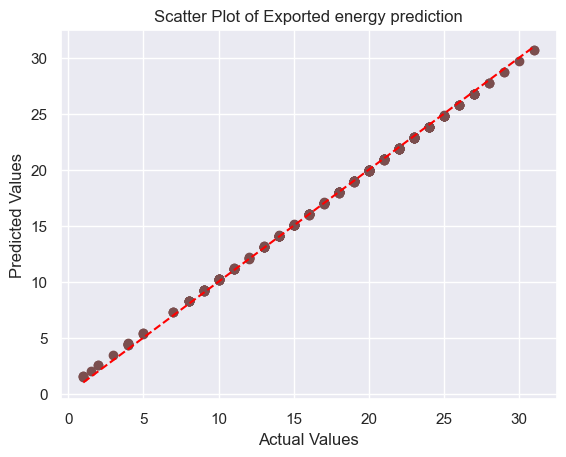

In [25]:

#exported energy
for name, model in base_models:
    model.fit(X_train_exp, y_train_exp)
    prediction = model.predict(X_test_exp)

    r2 = model.score(X_test_exp, y_test_exp)
    rmse = mean_squared_error(y_test_exp, prediction, squared = False)
    mse = mean_squared_error(y_test_exp, prediction)
    mae = mean_absolute_error(y_test_exp, prediction)
    mape = mean_absolute_percentage_error(y_test_exp, prediction)

    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean Squared Error: {}".format(mse))
    print("Mean Absolute Error: {}".format(mae))
    print("Mean Absolute Percentage Error: {}".format(mape))
    print("----------------------------------\n")

stacked.fit(X_train_exp, y_train_exp)
stacked_prediction = stacked.predict(X_test_exp)
stacked_r2 = stacked.score(X_test_exp, y_test_exp)
stacked_rmse = mean_squared_error(y_test_exp, stacked_prediction, squared = False)
stacked_mse = mean_squared_error(y_test_exp, stacked_prediction)
stacked_mae = mean_absolute_error(y_test_exp, stacked_prediction)
stacked_mape = mean_absolute_percentage_error(y_test_exp, stacked_prediction)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
print("Mean Squared Error: {}".format(stacked_mse))
print("Mean Absolute Error: {}".format(stacked_mae))
print("Mean Absolute Percentage Error: {}".format(stacked_mape))

print("----------------------------------")


# Create a scatter plot
plt.scatter(y_test_exp, stacked_prediction)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Exported energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--')

# Display the plot
plt.show()

In [26]:

# Create the Bagging Regressor with RandomForestRegressor as base estimator
bagging_reg = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=0)

# Fit the model
bagging_reg.fit(X_train_gen, y_train_gen)

# Predict
bagregressor_pred = bagging_reg.predict(X_test_gen)


In [27]:
r2 = bagging_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_gen, bagregressor_pred)
mae = mean_absolute_error(y_test_gen, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_gen, bagregressor_pred)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")


-------Stacked Ensemble-------
Coefficient of determination: 0.9764750724299817
Root Mean Squared Error: 0.9840886567893293
Mean Squared Error: 0.9684304844214264
Mean Absolute Error: 0.7053688805460752
Mean Absolute Percentage Error: 0.04253785724946456
----------------------------------


In [28]:
# Create the Bagging Regressor with RandomForestRegressor as base estimator
bagging_reg = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=10, random_state=0)

# Fit the model
bagging_reg.fit(X_train_exp, y_train_exp)

# Predict
bagregressor_pred = bagging_reg.predict(X_test_exp)

In [29]:
r2 = bagging_reg.score(X_test_exp, y_test_exp)
rmse = mean_squared_error(y_test_exp, bagregressor_pred, squared = False)
mse = mean_squared_error(y_test_exp, bagregressor_pred)
mae = mean_absolute_error(y_test_exp, bagregressor_pred)
mape = mean_absolute_percentage_error(y_test_exp, bagregressor_pred)

In [30]:
print("-------Bagging regressor-------")
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))

print("----------------------------------")

-------Bagging regressor-------
Coefficient of determination: 0.9423096003441312
Root Mean Squared Error: 1.542857157449618
Mean Squared Error: 2.380408208293515
Mean Absolute Error: 0.8009047781569966
Mean Absolute Percentage Error: 0.0773461154385386
----------------------------------


## Boosting Regressor

In [31]:
#gradient boosting regressor for generated energy
grad_reg = GradientBoostingRegressor(random_state=0)
grad_reg.fit(X_train_gen, y_train_gen)

#preditions
grad_pred =  grad_reg.predict(X_test_gen)

In [32]:
r2 = grad_reg.score(X_test_gen, y_test_gen)
rmse = mean_squared_error(y_test_gen, grad_pred, squared = False)
mse = mean_squared_error(y_test_gen, grad_pred)
mae = mean_absolute_error(y_test_gen, grad_pred)
mape = mean_absolute_percentage_error(y_test_gen, grad_pred)

print("-------{}-------".format(name))
print("Coefficient of determination: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Mean Absolute Percentage Error: {}".format(mape))
print("----------------------------------\n")

-------Linear Regression-------
Coefficient of determination: 0.9826364270438103
Root Mean Squared Error: 0.8454533055609537
Mean Squared Error: 0.7147912918839433
Mean Absolute Error: 0.6351901481007052
Mean Absolute Percentage Error: 0.04063154168876142
----------------------------------



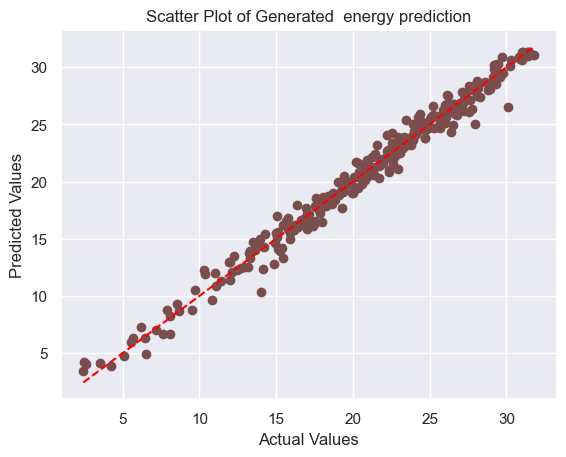

In [33]:
# Create a scatter plot
plt.scatter(y_test_gen, grad_pred)

# Set plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Generated  energy prediction')

# Add a diagonal line for reference
plt.plot([min(y_test_gen), max(y_test_gen)], [min(y_test_gen), max(y_test_gen)], color='red', linestyle='--')

# Display the plot
plt.show()

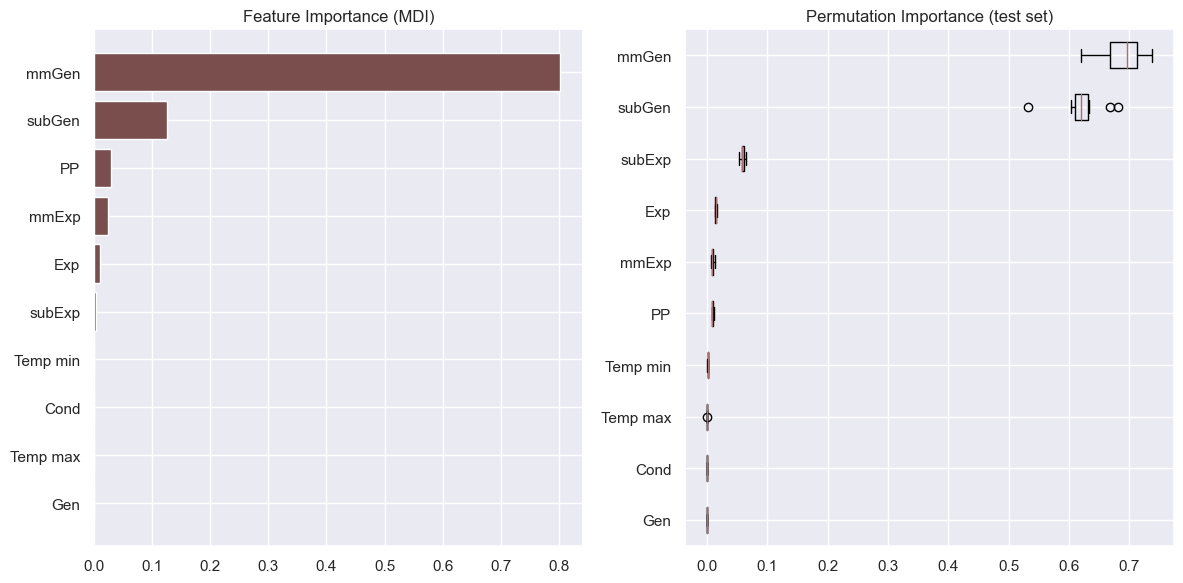

In [34]:
from sklearn.inspection import permutation_importance
feature_importance = grad_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    grad_reg, X_test_gen, y_test_gen, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(data.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Time series Validation

The code performs forward chaining cross-validation using TimeSeriesSplit with 5 splits on the given data, iterating over each fold. Within each iteration, it trains the model on the training data, makes predictions on the test data, calculates the mean squared error (MSE) between the predicted and actual values, and stores the MSE scores in a list. Finally, it computes the average MSE across all folds and prints the result.

The average mean squared error (MSE) of approximately 0.55 suggests that, on average, the squared differences between the predicted values and the actual values (in this case, the "Gen" variable) across all folds are around 0.55. Very Low MSE values indicate better performance of the model, implying that the model's predictions are closer to the actual values.

In [35]:

# Define features (X) and target variable (y)
X = data.drop(columns=['Gen'])  # Features
y = data['Gen']  # Target variable

# Define the number of splits for forward chaining
n_splits = 5

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define lists to store evaluation metrics
mse_scores = []

# Perform forward chaining validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train your model (replace with your model training code)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Compute average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average Mean Squared Error (Forward Chaining):", average_mse)


Average Mean Squared Error (Forward Chaining): 0.5049911300067682


Same performed for exported energy. A mean squared error (MSE) of approximately 0.012 indicates that the very low MSE values suggest better model performance, indicating that the model's predictions are closer to the actual values.

In [36]:

# Define features (X) and target variable (y)
X = data.drop(columns=['Exp'])  # Features
y = data['Exp']  # Target variable

# Define the number of splits for forward chaining
n_splits = 5

# Initialize TimeSeriesSplit with the number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

# Define lists to store evaluation metrics
mse_scores = []

# Perform forward chaining validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train your model (replace with your model training code)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Compute average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average Mean Squared Error (Forward Chaining):", average_mse)


Average Mean Squared Error (Forward Chaining): 0.01287618506607984


## Cross Validation
This code first performs a train-test split validation to evaluate the performance of a RandomForestRegressor model on predicting a target variable (y) based on features (X). It then conducts 5-fold cross-validation using KFold to assess the model's performance more robustly. For each fold in cross-validation, it trains the model, makes predictions on the test set, calculates mean squared error (MSE) and coefficient of determination (R^2) scores, and aggregates these scores. Finally, it computes the average MSE and R^2 across all folds and plots the residuals of the last fold.

Train-Test Split Validation:
Mean Squared Error: 0.9286759351535835
Coefficient of Determination (R^2): 0.9770196568286178

Cross-Validation:
Average Mean Squared Error: 1.6313060826686612
Average Coefficient of Determination (R^2): 0.9602402460405534



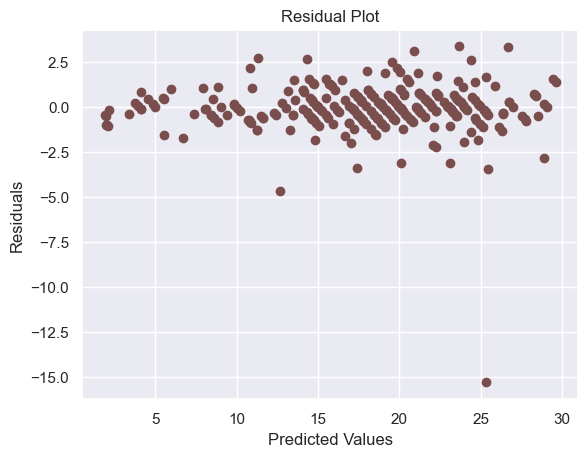

In [37]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train, X_test, y_train, y_test are available
# No need to convert X to numpy array if it's already in that format
# 1. Train-Test Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor in this case)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Train-Test Split Validation:")
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2):", r2)
print()

# 2. Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

# Convert X to DataFrame if it's not already
X = pd.DataFrame(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use iloc for DataFrame indexing
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is a Series object

    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print("Cross-Validation:")
print("Average Mean Squared Error:", avg_mse)
print("Average Coefficient of Determination (R^2):", avg_r2)
print()

residuals = y_test - y_pred

# Plotting residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


The "Train-Test Split Validation" provides the performance metrics of the model when evaluated on a separate test set that was not seen during training. The mean squared error (MSE) in this validation is approximately 0.951, indicating that, on average, the squared differences between predicted and actual values are relatively low. The coefficient of determination (R^2) score of around 0.977 suggests that approximately 97.7% of the variance in the target variable is explained by the model.

In the "Cross-Validation", the average MSE across all folds is approximately 1.673, which represents the overall performance of the model in predicting unseen data when employing 5-fold cross-validation. Additionally, the average R^2 score of about 0.958 indicates that the model explains approximately 95.8% of the variance in the target variable on average across all folds. These metrics provide insights into the model's generalization performance and robustness.